/var/folders/45/l9pwq7313tb9ss_6yl0pxhp00000gn/T/ipykernel_57196/3555754745.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_class['Sector'][i] = int(train_class['Sector'][i][7])
/var/folders/45/l9pwq7313tb9ss_6yl0pxhp00000gn/T/ipykernel_57196/3555754745.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_class['Soil'][i] = int(train_class['Soil'][i][5:])
/var/folders/45/l9pwq7313tb9ss_6yl0pxhp00000gn/T/ipykernel_57196/3555754745.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

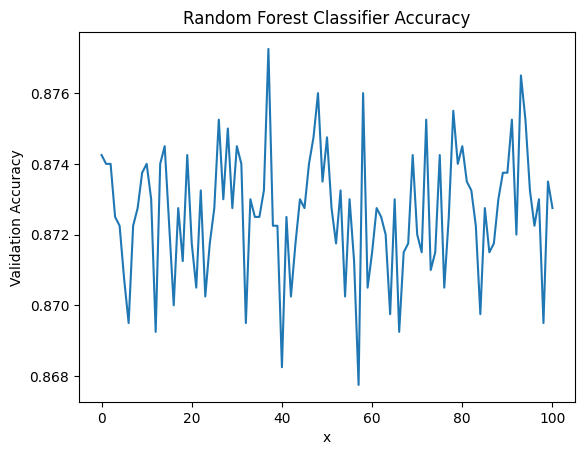

0.87725
37


"\n#RandomForestClassifier classification with n_estimator=37\nclassifier = RandomForestClassifier(n_estimators = 100, random_state=37)\nclassifier.fit(train_class, train_label)\nCategory = classifier.predict(test_class)\n\n#data to csv with Id Category\nId = list(range(20000))\ndf = pd.DataFrame({'Id' : Id, 'Category' : Category })\ndf.to_csv('sample_classification.csv',index=False)\n"

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_class = pd.read_csv('train_classification.csv')
test_class = pd.read_csv('test_classification.csv')

#인코딩 (문자열 자르고 to int64)
for i, x in enumerate(train_class['Sector']):
    train_class['Sector'][i] = int(train_class['Sector'][i][7])
train_class = train_class.astype({'Sector':'int64'})

for i, x in enumerate(train_class['Soil']):
    train_class['Soil'][i] = int(train_class['Soil'][i][5:])
train_class = train_class.astype({'Soil':'int64'})

for i, x in enumerate(test_class['Sector']):
    test_class['Sector'][i] = int(test_class['Sector'][i][7])
test_class = test_class.astype({'Sector':'int64'})

for i, x in enumerate(test_class['Soil']):
    test_class['Soil'][i] = int(test_class['Soil'][i][5:])
test_class = test_class.astype({'Soil':'int64'})

#데이터 라벨링 
train_label = train_class['Plant_species']
train_class = train_class.drop(['Plant_species'],axis=1)

"""
#RandomForestClassifier로 n_estimator를 0부터 100까지 진행 후 가장 최적의 n_estimator값을 찾은 결과 37이었다
training_data, validation_data , training_labels, validation_labels = train_test_split(train_class, train_label, test_size = 0.2, random_state = 100)
rf_list = range(0,101)
accuracies = []
max = -999
max_n = 0
for x in rf_list:
    classifier = RandomForestClassifier(n_estimators=100, random_state=x)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))
    #print(x)
    #print(classifier.score(validation_data, validation_labels))
    if(max < classifier.score(validation_data, validation_labels)):
        max = classifier.score(validation_data, validation_labels)
        max_n = x
plt.plot(rf_list, accuracies)
plt.xlabel("x")
plt.ylabel("Validation Accuracy")
plt.title("Random Forest Classifier Accuracy")
plt.show()
print(max)
print(max_n)
"""
#RandomForestClassifier classification with n_estimator=37
classifier = RandomForestClassifier(n_estimators = 100, random_state=37)
classifier.fit(train_class, train_label)
Category = classifier.predict(test_class)

#data to csv with Id Category
Id = list(range(20000))
df = pd.DataFrame({'Id' : Id, 'Category' : Category })
df.to_csv('sample_classification.csv',index=False)